In [1]:
import cv2 as cv
import matplotlib.pyplot as plt

In [44]:
img = cv.imread("./data/messi5.jpg", cv.IMREAD_COLOR_RGB)
# img = cv.cvtColor(img, cv.COLOR_BGR2RGB)

In [45]:
lower_reso = cv.pyrDown(img)
higher_reso = cv.pyrUp(lower_reso)  

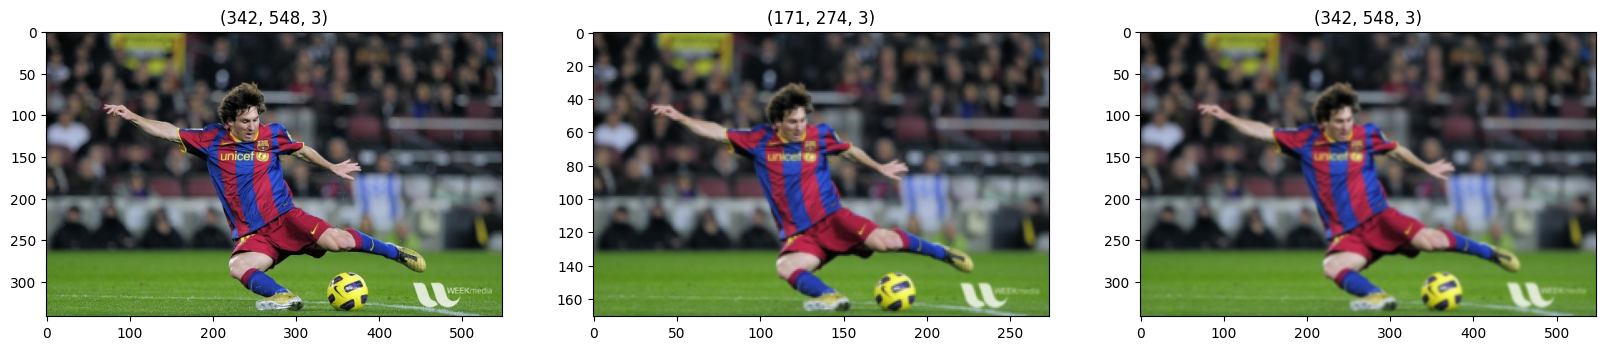

In [46]:
plt.figure(figsize=(20,10))
plt.subplot(1,3,1); plt.title(img.shape); plt.imshow(img)
plt.subplot(1,3,2); plt.title(lower_reso.shape); plt.imshow(lower_reso)
plt.subplot(1,3,3); plt.title(higher_reso.shape); plt.imshow(higher_reso)

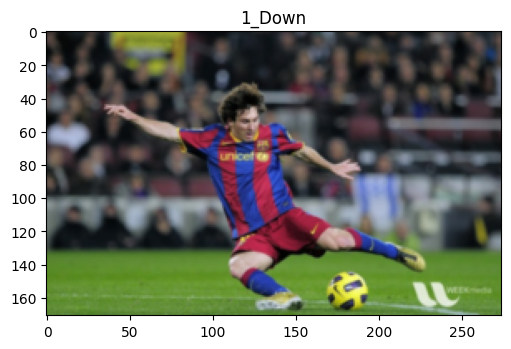

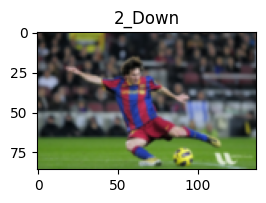

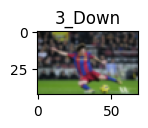

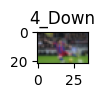

In [48]:
i, iterations = 1, 4
imgDwn = img.copy()
while i <= iterations:
    plt.figure(figsize=(imgDwn.shape[1]//20,imgDwn.shape[0]//20)); plt.subplot(1, iterations, i); plt.title(f"{i}_Down")
    imgDwn = cv.pyrDown(imgDwn)
    plt.imshow(imgDwn)
    i += 1

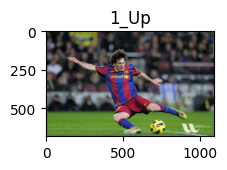

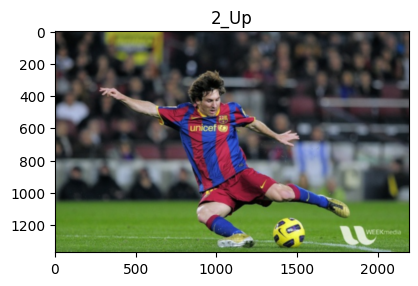

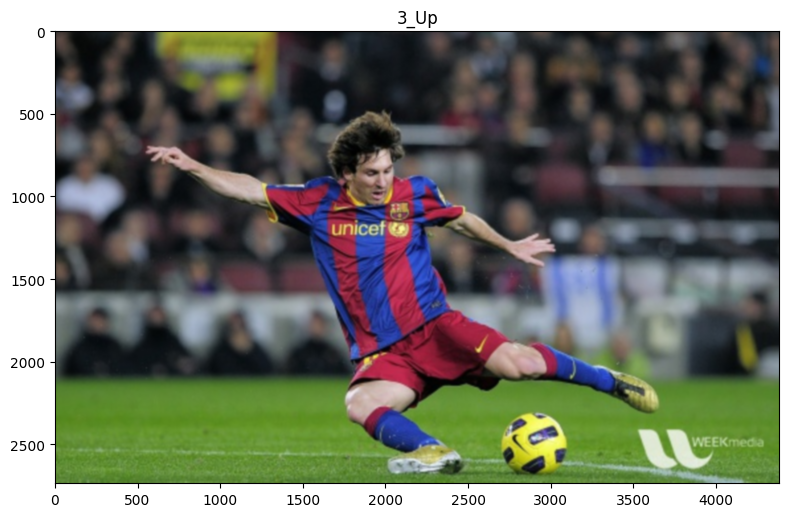

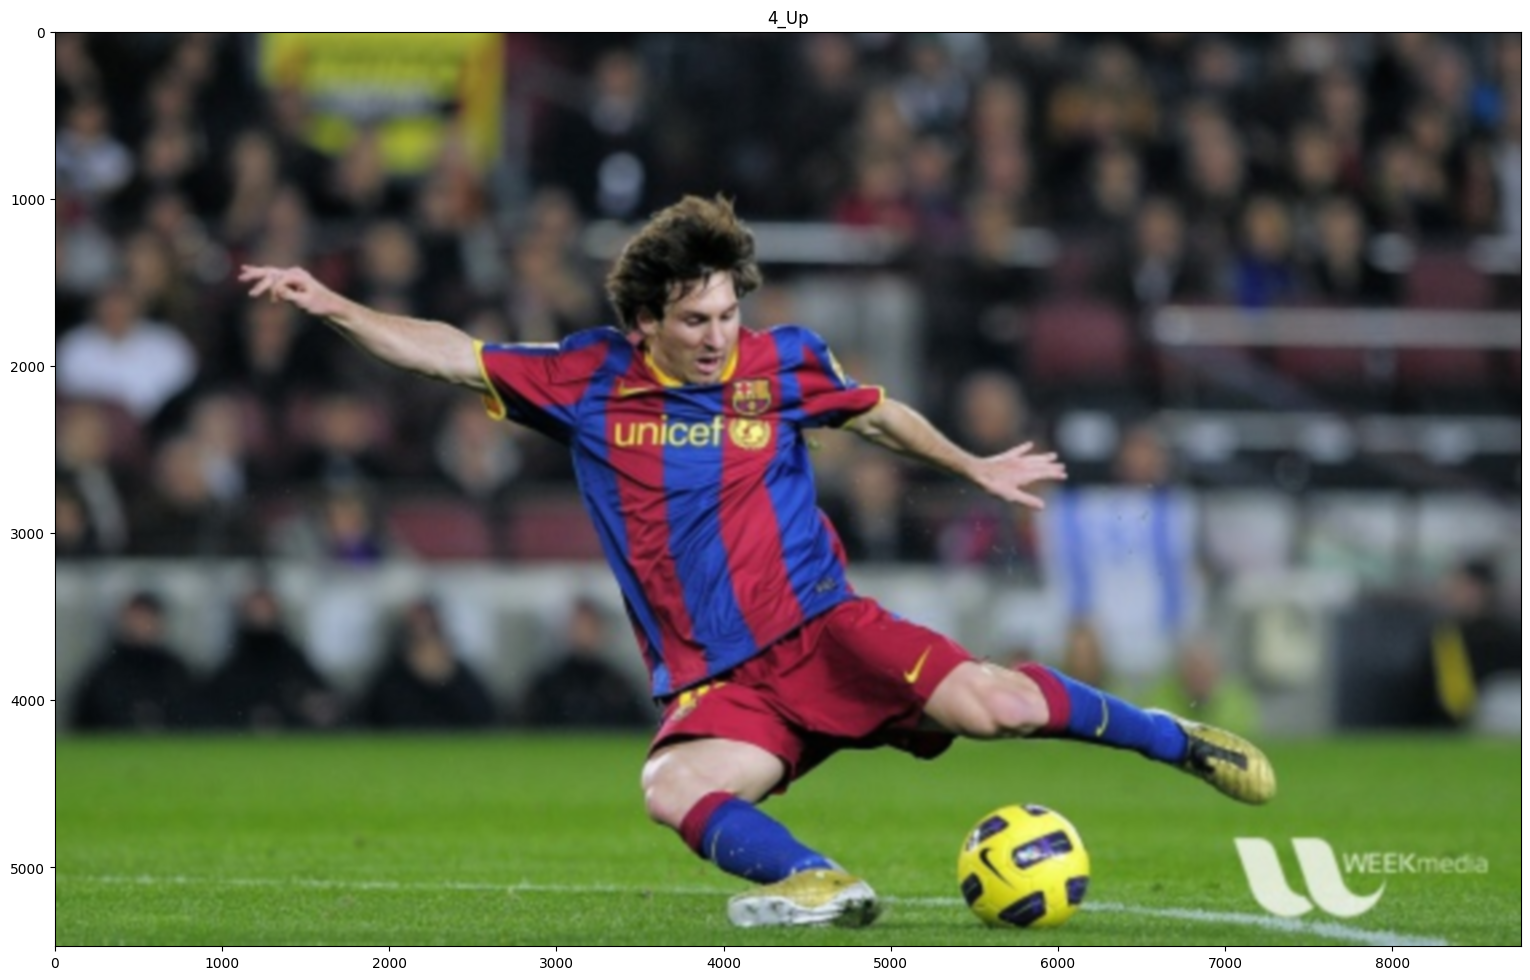

In [50]:
i, iterations = 1, 4
imgUp = img.copy()
while i <= iterations:
    plt.figure(figsize=(imgUp.shape[1]//50,imgUp.shape[0]//50)); plt.subplot(1, iterations, i); plt.title(f"{i}_Up")
    imgUp = cv.pyrUp(imgUp)
    plt.imshow(imgUp)
    i += 1

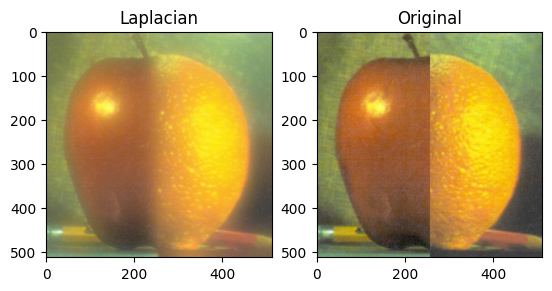

In [56]:
import numpy as np
A = cv.imread('./data/apple.jpg')
B = cv.imread('./data/orange.jpg')
 
# generate Gaussian pyramid for A
G = A.copy()
gpA = [G]
for i in range(6):
    G = cv.pyrDown(G)
    gpA.append(G)
 
# generate Gaussian pyramid for B
G = B.copy()
gpB = [G]
for i in range(6):
    G = cv.pyrDown(G)
    gpB.append(G)
 
# generate Laplacian Pyramid for A
lpA = [gpA[5]]
for i in range(5,0,-1):
    GE = cv.pyrUp(gpA[i])
    L = cv.subtract(gpA[i-1],GE)
    lpA.append(L)
 
# generate Laplacian Pyramid for B
lpB = [gpB[5]]
for i in range(5,0,-1):
    GE = cv.pyrUp(gpB[i])
    L = cv.subtract(gpB[i-1],GE)
    lpB.append(L)
 
# Now add left and right halves of images in each level
LS = []
for la,lb in zip(lpA,lpB):
    rows,cols,dpt = la.shape
    ls = np.hstack((la[:,0:cols//2], lb[:,cols//2:]))
    LS.append(ls)
 
# now reconstruct
ls_ = LS[0]
for i in range(1,6):
    ls_ = cv.pyrUp(ls_)
    ls_ = cv.add(ls_, LS[i])
 
# image with direct connecting each half
real = np.hstack((A[:,:cols//2],B[:,cols//2:]))

plt.subplot(1,2,1); plt.title("Laplacian"); plt.imshow(cv.cvtColor(ls_, cv.COLOR_BGR2RGB))
plt.subplot(1,2,2); plt.title("Original"); plt.imshow(cv.cvtColor(real, cv.COLOR_BGR2RGB))